In [44]:
## Elaborated Analysis
%load_ext autoreload
%autoreload 2
from Socialanalysis_main import SocialDataAnalysis
import pandas as pd 
import numpy as np
import tweepy as tw 
import os


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
tw.__version__

'4.8.0'

In [45]:
API_KEY_SECRET = os.environ["API_KEY_SECRET_twitter"]
API_KEY= os.environ["API_KEY_twitter"]

In [130]:
twitter=SocialDataAnalysis(API_KEY_SECRET,API_KEY)
api=twitter.connect_twitter()

In [137]:
search_list=["#RussiaUkraineWar","#War" , "#NetflixWar","#BearMarket","#FinancialWar" ,"#Army","#Energy" ]
fromDate ="202001010000"
toDate = "202204200000"

In [139]:
twitter_df = twitter.twitter_loop(search_list,fromDate,toDate,100," twitter_search_30_day")

176it [01:09,  2.55it/s]                         
159it [00:59,  2.68it/s]                         
0it [00:00, ?it/s]
180it [01:14,  2.42it/s]                         
23it [00:09,  2.32it/s]                        
157it [01:06,  2.38it/s]                         
119it [00:49,  2.50it/s]                         Rate limit reached. Sleeping for: 402
178it [08:09,  2.75s/it] 


In [140]:
np.shape(twitter_df)

(516, 16)

In [152]:
del(twitter_df["Unnamed: 0"])

In [173]:
#del(twitter_df["user_name"])
#del(twitter_df["user_description"])
#del(twitter_df["user_verified"])

In [154]:
twitter_df.to_csv("Data/twitter_df.csv", sep=",")

In [155]:
twitter_df= pd.read_csv("Data/twitter_df.csv", sep=",")

In [156]:
twitter_df

,Unnamed: 0,user_location,id,date,text,in_reply_to_status_id,in_reply_to_user_id,retweet_original_user,retweet_original_tweet_id,hashtags,retweet_count,favorite_count,source,user_id
0,0,NaN,1517969386249854977,2022-04-23 20:51:18+00:00,Последствия боевых действий на востоке Украины...,NaN,NaN,NaN,NaN,"['Украина', 'Ukraine', 'UkraineWar', 'RussiaUk...",0,0,Twitter for Android,8.028000e+17
1,1,NaN,1517969260949250048,2022-04-23 20:50:48+00:00,@TheresiaCrone #climatecrisis and #RussiaUkrai...,1.517892e+18,1.193110e+18,NaN,NaN,"['climatecrisis', 'RussiaUkraineWar', 'renewab...",0,0,Twitter Web App,1.009679e+09
2,2,Italia,1517968508813991936,2022-04-23 20:47:49+00:00,#Russia 🇷🇺 / #Ukraine 🇺🇦\n\n❗❗Explosions repor...,NaN,NaN,NaN,NaN,"['Russia', 'Ukraine', 'UkraineRussianWar', 'Ru...",0,0,Twitter for Android,9.852641e+17
3,3,NaN,1517967820105170944,2022-04-23 20:45:05+00:00,#Turkey closes airspace to Russian military ai...,NaN,NaN,NaN,NaN,"['Turkey', 'Syria', 'Russia', 'Ukraine', 'Russ...",1,1,Twitter Web App,1.326832e+08
4,4,NaN,1517967450721112064,2022-04-23 20:43:37+00:00,#NaziRussia #Nazi #NaziRussianArmy #WarCrimes ...,NaN,NaN,NaN,NaN,"['NaziRussia', 'Nazi', 'NaziRussianArmy', 'War...",0,0,Twitter for Android,1.498691e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07
512,512,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07
513,513,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07
514,514,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07


In [159]:
df=twitter_df
df['user_location'].value_counts()

New York                  33
United States             27
London                    25
Kuala Lumpur, Malaysia    19
( Scotland UK )           16
                          ..
Kyiv - Ukraine             1
London, England            1
Denver, CO                 1
EVERYWHERE                 1
Lemont PA                  1
Name: user_location, Length: 116, dtype: int64

In [174]:
#!pip install wordcloud

In [165]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [167]:
hashtags_col = df[~df['hashtags'].isna()]['hashtags']
hashtags_col = hashtags_col.apply(eval)

In [168]:
hashtags = pd.Series([hashtag for hashtags_list in hashtags_col for hashtag in hashtags_list])

In [169]:
wordcloud = WordCloud(width=4000, height=2000, background_color="white", mode="RGBA", prefer_horizontal=0.5)
wordcloud.fit_words(hashtags.value_counts())

(-0.5, 3999.5, 1999.5, -0.5)

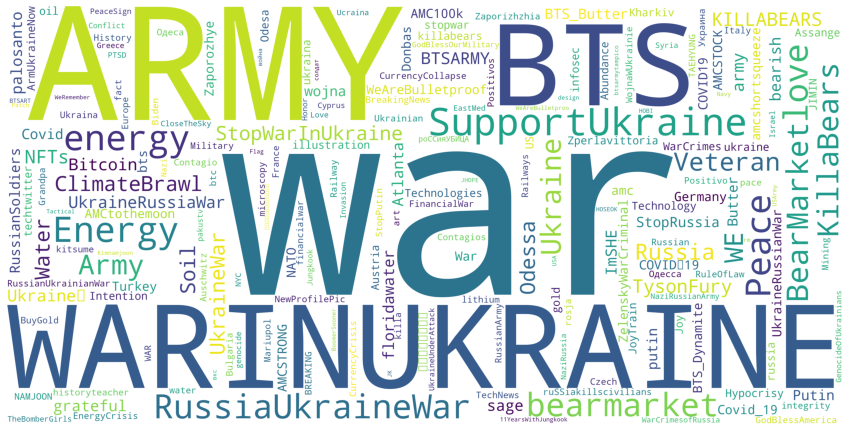

In [170]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis("off")

In [175]:
#!pip install nltk

In [176]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\finnocenti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\finnocenti\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [177]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import re
import string

In [178]:
example_sent = df.loc[1, 'text']
example_sent

'@TheresiaCrone #climatecrisis and #RussiaUkraineWar both demand a #renewableenergy revolution ! - - - - in this context, not to forget: agro-photovoltaics: good against #climatecrisis + #energydependency + unemployment; and brings even higher #harvest results in many cases (cf. Fraunhofer ISE)'

In [179]:
# rimozione links
filtered_sentence = re.sub(r"http\S+", "", example_sent)

# lowercase
filtered_sentence = filtered_sentence.lower()

# stopwords
stop_words = set(stopwords.words('italian'))
word_tokens = word_tokenize(filtered_sentence)
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# rimuovo rt pattern
if filtered_sentence[0] == 'rt':
    filtered_sentence = filtered_sentence[4:]

# rimuovo punteggiatura
filtered_sentence = list(filter(lambda token: token not in string.punctuation, filtered_sentence))

In [180]:
filtered_sentence

['theresiacrone',
 'climatecrisis',
 'and',
 'russiaukrainewar',
 'both',
 'demand',
 'renewableenergy',
 'revolution',
 'this',
 'context',
 'not',
 'to',
 'forget',
 'agro-photovoltaics',
 'good',
 'against',
 'climatecrisis',
 'energydependency',
 'unemployment',
 'and',
 'brings',
 'even',
 'higher',
 'harvest',
 'results',
 'many',
 'cases',
 'cf',
 'fraunhofer',
 'ise']

In [181]:
# rimozione links
filtered_sentence = re.sub(r"http\S+", "", example_sent)

# lowercase
filtered_sentence = filtered_sentence.lower()

# stopwords
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(filtered_sentence)
filtered_sentence = [w for w in word_tokens if not w in stop_words]

# rimuovo rt pattern
if filtered_sentence[0] == 'rt':
    filtered_sentence = filtered_sentence[4:]

# rimuovo punteggiatura
filtered_sentence = list(filter(lambda token: token not in string.punctuation, filtered_sentence))

In [182]:
filtered_sentence

['theresiacrone',
 'climatecrisis',
 'russiaukrainewar',
 'demand',
 'renewableenergy',
 'revolution',
 'context',
 'forget',
 'agro-photovoltaics',
 'good',
 'climatecrisis',
 'energydependency',
 'unemployment',
 'brings',
 'even',
 'higher',
 'harvest',
 'results',
 'many',
 'cases',
 'cf',
 'fraunhofer',
 'ise']

In [183]:
def clean(df):
    sentence = df['text']
    filtered_sentence = re.sub(r"http\S+", "", sentence)
    filtered_sentence = filtered_sentence.lower()
    stop_words = set(stopwords.words('italian'))
    word_tokens = word_tokenize(filtered_sentence)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    if filtered_sentence[0] == 'rt':
        filtered_sentence = filtered_sentence[4:]
    filtered_sentence = list(filter(lambda token: token not in string.punctuation, filtered_sentence))
    return ' '.join(filtered_sentence)

In [184]:
df['cleaned'] = df.apply(clean, axis=1)

In [185]:
df[['text', 'cleaned']]

,text,cleaned
0,Последствия боевых действий на востоке Украины...,последствия боевых действий на востоке украины...
1,@TheresiaCrone #climatecrisis and #RussiaUkrai...,theresiacrone climatecrisis and russiaukrainew...
2,#Russia 🇷🇺 / #Ukraine 🇺🇦\n\n❗❗Explosions repor...,russia 🇷🇺 ukraine 🇺🇦 ❗❗explosions reported myk...
3,#Turkey closes airspace to Russian military ai...,turkey closes airspace to russian military air...
4,#NaziRussia #Nazi #NaziRussianArmy #WarCrimes ...,nazirussia nazi nazirussianarmy warcrimes warc...
...,...,...
511,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,therealnumber6 risepdx jackthelad1947 seth_lei...
512,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,therealnumber6 risepdx jackthelad1947 seth_lei...
513,The past 7 years have been the hottest in reco...,the past 7 years have been the hottest recorde...
514,The past 7 years have been the hottest in reco...,the past 7 years have been the hottest recorde...


In [187]:
df.to_csv('Data/result_cleaned.csv', index=False)

In [188]:
df

,Unnamed: 0,user_location,id,date,text,in_reply_to_status_id,in_reply_to_user_id,retweet_original_user,retweet_original_tweet_id,hashtags,retweet_count,favorite_count,source,user_id,cleaned
0,0,NaN,1517969386249854977,2022-04-23 20:51:18+00:00,Последствия боевых действий на востоке Украины...,NaN,NaN,NaN,NaN,"['Украина', 'Ukraine', 'UkraineWar', 'RussiaUk...",0,0,Twitter for Android,8.028000e+17,последствия боевых действий на востоке украины...
1,1,NaN,1517969260949250048,2022-04-23 20:50:48+00:00,@TheresiaCrone #climatecrisis and #RussiaUkrai...,1.517892e+18,1.193110e+18,NaN,NaN,"['climatecrisis', 'RussiaUkraineWar', 'renewab...",0,0,Twitter Web App,1.009679e+09,theresiacrone climatecrisis and russiaukrainew...
2,2,Italia,1517968508813991936,2022-04-23 20:47:49+00:00,#Russia 🇷🇺 / #Ukraine 🇺🇦\n\n❗❗Explosions repor...,NaN,NaN,NaN,NaN,"['Russia', 'Ukraine', 'UkraineRussianWar', 'Ru...",0,0,Twitter for Android,9.852641e+17,russia 🇷🇺 ukraine 🇺🇦 ❗❗explosions reported myk...
3,3,NaN,1517967820105170944,2022-04-23 20:45:05+00:00,#Turkey closes airspace to Russian military ai...,NaN,NaN,NaN,NaN,"['Turkey', 'Syria', 'Russia', 'Ukraine', 'Russ...",1,1,Twitter Web App,1.326832e+08,turkey closes airspace to russian military air...
4,4,NaN,1517967450721112064,2022-04-23 20:43:37+00:00,#NaziRussia #Nazi #NaziRussianArmy #WarCrimes ...,NaN,NaN,NaN,NaN,"['NaziRussia', 'Nazi', 'NaziRussianArmy', 'War...",0,0,Twitter for Android,1.498691e+18,nazirussia nazi nazirussianarmy warcrimes warc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...
512,512,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...
513,513,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...
514,514,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...


In [286]:
df['cleaned']

0      последствия боевых действий на востоке украины...
1      theresiacrone climatecrisis and russiaukrainew...
2      russia 🇷🇺 ukraine 🇺🇦 ❗❗explosions reported myk...
3      turkey closes airspace to russian military air...
4      nazirussia nazi nazirussianarmy warcrimes warc...
                             ...                        
511    therealnumber6 risepdx jackthelad1947 seth_lei...
512    therealnumber6 risepdx jackthelad1947 seth_lei...
513    the past 7 years have been the hottest recorde...
514    the past 7 years have been the hottest recorde...
515    let ’ s take look at how this igu global energ...
Name: cleaned, Length: 516, dtype: object

In [287]:
sent = [row.split() for row in df['cleaned']]

In [288]:
sent[0]

['последствия',
 'боевых',
 'действий',
 'на',
 'востоке',
 'украины',
 'украина',
 'ukraine',
 'ukrainewar',
 'russiaukrainewar',
 'war',
 'ukrainerussianwar',
 'warinukraine']

In [193]:
#!pip install gensim

     ---------------------------------------- 24.0/24.0 MB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 KB 1.6 MB/s eta 0:00:00
  Using cached Cython-0.29.23-cp38-cp38-win_amd64.whl (1.7 MB)
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.24
    Uninstalling Cython-0.29.24:
      Successfully uninstalled Cython-0.29.24


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.0.1 requires cmdstanpy==0.9.68, which is not installed.
prophet 1.0.1 requires setuptools-git>=1.2, which is not installed.


In [289]:
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sent, min_count=10)
bigram = Phraser(phrases)
sentences = bigram[sent]

2022-04-24 00:22:34,315 : INFO : collecting all words and their counts
2022-04-24 00:22:34,316 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2022-04-24 00:22:34,376 : INFO : collected 8332 token types (unigram + bigrams) from a corpus of 12520 words and 516 sentences
2022-04-24 00:22:34,376 : INFO : merged Phrases<8332 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2022-04-24 00:22:34,382 : INFO : Phrases lifecycle event {'msg': 'built Phrases<8332 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000> in 0.07s', 'datetime': '2022-04-24T00:22:34.382692', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}
2022-04-24 00:22:34,382 : INFO : exporting phrases from Phrases<8332 vocab, min_count=10, threshold=10.0, max_vocab_size=40000000>
2022-04-24 00:22:34,440 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<136 ph

In [290]:
import multiprocessing
cores = multiprocessing.cpu_count()

In [291]:
from gensim.models import Word2Vec

model = Word2Vec(
    window = 10, 
    min_count = 5,
    sample=6e-5,
    alpha=0.03,
    min_alpha=0.0007,
    negative=10,
    workers=cores
)

2022-04-24 00:22:36,481 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec(vocab=0, vector_size=100, alpha=0.03)', 'datetime': '2022-04-24T00:22:36.481991', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'created'}


In [292]:
model.build_vocab(sentences)

2022-04-24 00:22:37,761 : INFO : collecting all words and their counts
2022-04-24 00:22:37,762 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-04-24 00:22:37,800 : INFO : collected 3106 word types from a corpus of 10821 raw words and 516 sentences
2022-04-24 00:22:37,801 : INFO : Creating a fresh vocabulary
2022-04-24 00:22:37,815 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 468 unique words (15.067611075338055%% of original 3106, drops 2638)', 'datetime': '2022-04-24T00:22:37.815339', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'prepare_vocab'}
2022-04-24 00:22:37,817 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 6980 word corpus (64.50420478698827%% of original 10821, drops 3841)', 'datetime': '2022-04-24T00:22:37.817015', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MS

In [293]:
model.corpus_count

516

In [294]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [295]:
model.train(sentences, total_examples=model.corpus_count, epochs=100)

2022-04-24 00:22:42,132 : INFO : Word2Vec lifecycle event {'msg': 'training model with 4 workers on 468 vocabulary and 100 features, using sg=0 hs=0 sample=6e-05 negative=10 window=10 shrink_windows=True', 'datetime': '2022-04-24T00:22:42.132020', 'gensim': '4.1.2', 'python': '3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19044-SP0', 'event': 'train'}
2022-04-24 00:22:42,297 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04-24 00:22:42,298 : INFO : worker thread finished; awaiting finish of 2 more threads
2022-04-24 00:22:42,298 : INFO : worker thread finished; awaiting finish of 1 more threads
2022-04-24 00:22:42,298 : INFO : worker thread finished; awaiting finish of 0 more threads
2022-04-24 00:22:42,306 : INFO : EPOCH - 1 : training on 10821 raw words (1218 effective words) took 0.1s, 11006 effective words/s
2022-04-24 00:22:42,758 : INFO : worker thread finished; awaiting finish of 3 more threads
2022-04

(126909, 1082100)

In [296]:
model.wv.similar_by_word("war")

[('ukraine', 0.9935193657875061),
 ('against', 0.9930575489997864),
 ('russian', 0.9927749633789062),
 ('most', 0.9927155375480652),
 ('or', 0.9923295974731445),
 ('as', 0.9919667840003967),
 ('nato', 0.9914767146110535),
 ('russia', 0.9913021326065063),
 ('weapons', 0.9907856583595276),
 ('did', 0.9906713366508484)]

In [212]:
model.wv.similar_by_word("ukraina")

[('wojna', 0.9985077381134033),
 ('w', 0.9983822107315063),
 ('stoprussia', 0.9980173707008362),
 ('stoprussianaggression', 0.9978903532028198),
 ('warcrimes', 0.9974966049194336),
 ('warinukraine', 0.9970760941505432),
 ('на', 0.996661365032196),
 ('z', 0.9960535764694214),
 ('art', 0.9959884285926819),
 ('great', 0.9958624243736267)]

## LL 2

In [297]:
import numpy as np

embeddings = []

for sentence in sentences:
    sentence_embedding = np.zeros((100,))
    for word in sentence:
        try:
            sentence_embedding += model.wv[word]
        except:
            pass
    sentence_embedding = sentence_embedding / len(sentence)
    embeddings.append(sentence_embedding)

In [298]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(embeddings)

C:\Users\finnocenti\Anaconda3\envs\time_series\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\finnocenti\Anaconda3\envs\time_series\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


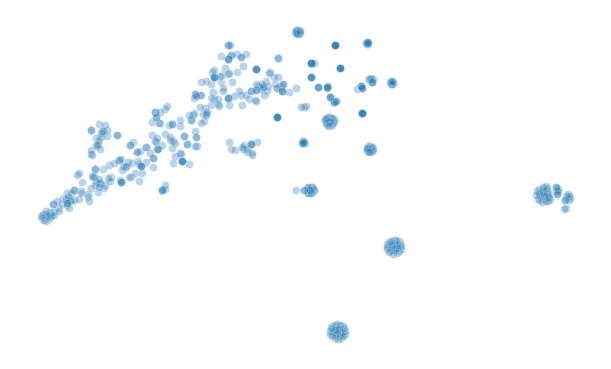

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

df_subset = pd.DataFrame()
df_subset['tsne-one'] = tsne_results[:,0]
df_subset['tsne-two'] = tsne_results[:,1] 

fig = plt.figure(figsize=(5, 3), dpi = 150)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

sc = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    data=df_subset,
    legend=None,
    alpha=0.3,
    s=15
)

In [300]:
from sklearn.cluster import KMeans

#NUM_CLUSTERS = 7

kclusterer = KMeans()
assigned_clusters = kclusterer.fit(embeddings)

In [310]:
assigned_clusters

KMeans()

In [311]:
centroids = kclusterer.cluster_centers_
centroids

array([[-6.12811689e-02,  7.37249360e-02,  2.58752403e-01,
         4.43582888e-01, -1.80022553e-01, -3.20102351e-01,
         2.35201098e-01,  2.37686835e-01,  1.00755000e-01,
        -8.19318842e-02, -1.60020214e-01, -2.00015034e-01,
         1.93681581e-01,  2.67315874e-01,  1.39175451e-02,
         3.33347570e-02,  2.32952748e-01, -2.22098531e-01,
        -2.40852736e-01, -3.61833835e-01,  1.85000817e-01,
         3.40377671e-01, -1.95570004e-01, -2.35706559e-01,
        -3.30396750e-01, -6.52241598e-03, -3.70091672e-01,
        -2.03765802e-01, -7.19410594e-02,  3.66473749e-02,
         4.45154860e-01,  1.03288363e-01,  1.91804082e-02,
        -1.78267919e-01, -3.45275377e-01,  4.07036662e-01,
         9.04012084e-03, -1.73146055e-01, -1.38973987e-01,
        -5.16310134e-01,  1.85946733e-01, -2.77864746e-01,
         8.26578880e-02, -4.63550744e-02,  1.85068407e-01,
        -1.81583002e-01, -3.19188214e-01, -1.62258202e-01,
         3.73515401e-01,  1.57386321e-01,  2.73149193e-0

In [312]:
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids, embeddings)

In [313]:
for i, id in enumerate(closest):
    print("Cluster {}: {}".format(i, ' '.join(sentences[id])))

Cluster 0: nursing_podcast chrisrock opensea supportukraine_rainbow 🌈_cares fundraising_4 ukraine_🇺🇦 warinukraine_war peace_love stopwarinukraine_compassion prayforukraine_stoprussia peaceinukraine_peaceandlove helpukrainewithcrypto_hope buynow_gt
Cluster 1: imf warns sanctioned nations like russia iran may use crypto mining to monetize energy resources
Cluster 2: energy_bills 🔺_deputy pm_matt hancock_claimed £2,588_last year_for heating_oil at_his suffolk_home where_he lived_with his_wife just_when you_thought you_couldn ’_t dislike_him much_more you_get £200_loan
Cluster 3: what helps understand what 's going on can not be ugly or inconvenient hypocrisy is ugly not the truth biden_putin ukraine ukrainewar ukrainerussiawar russiaukrainewar ukraineunderattack russiaukraineconflict facts
Cluster 4: killabearsnft_sweeeep 🧹🧹🧹_my little_swiffer was_followed by_ethviral 's_industrial leaf_blower 😅_killabears bearmarket_bearybullish killakrew
Cluster 5: do you have solution `` whats your pla

In [314]:
assigned_clusters = assigned_clusters.labels_

In [315]:
assigned_clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3,
       3, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3,
       1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 3, 1, 3, 3, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 3, 5, 1, 1, 4, 3, 3, 3, 3, 3,
       5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3,
       3, 1, 4, 1, 4, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 1, 1, 4, 5, 4,
       1, 3, 5, 5, 3, 1, 5, 5, 5, 3, 5, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1,
       4, 4, 4, 3, 4, 4, 4, 3, 1, 4, 4, 3, 1, 1, 1,

In [317]:
df["Cluster"]=assigned_clusters
df

,Unnamed: 0,user_location,id,date,text,in_reply_to_status_id,in_reply_to_user_id,retweet_original_user,retweet_original_tweet_id,hashtags,retweet_count,favorite_count,source,user_id,cleaned,Cluster
0,0,NaN,1517969386249854977,2022-04-23 20:51:18+00:00,Последствия боевых действий на востоке Украины...,NaN,NaN,NaN,NaN,"['Украина', 'Ukraine', 'UkraineWar', 'RussiaUk...",0,0,Twitter for Android,8.028000e+17,последствия боевых действий на востоке украины...,1
1,1,NaN,1517969260949250048,2022-04-23 20:50:48+00:00,@TheresiaCrone #climatecrisis and #RussiaUkrai...,1.517892e+18,1.193110e+18,NaN,NaN,"['climatecrisis', 'RussiaUkraineWar', 'renewab...",0,0,Twitter Web App,1.009679e+09,theresiacrone climatecrisis and russiaukrainew...,1
2,2,Italia,1517968508813991936,2022-04-23 20:47:49+00:00,#Russia 🇷🇺 / #Ukraine 🇺🇦\n\n❗❗Explosions repor...,NaN,NaN,NaN,NaN,"['Russia', 'Ukraine', 'UkraineRussianWar', 'Ru...",0,0,Twitter for Android,9.852641e+17,russia 🇷🇺 ukraine 🇺🇦 ❗❗explosions reported myk...,1
3,3,NaN,1517967820105170944,2022-04-23 20:45:05+00:00,#Turkey closes airspace to Russian military ai...,NaN,NaN,NaN,NaN,"['Turkey', 'Syria', 'Russia', 'Ukraine', 'Russ...",1,1,Twitter Web App,1.326832e+08,turkey closes airspace to russian military air...,1
4,4,NaN,1517967450721112064,2022-04-23 20:43:37+00:00,#NaziRussia #Nazi #NaziRussianArmy #WarCrimes ...,NaN,NaN,NaN,NaN,"['NaziRussia', 'Nazi', 'NaziRussianArmy', 'War...",0,0,Twitter for Android,1.498691e+18,nazirussia nazi nazirussianarmy warcrimes warc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...,1
512,512,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...,1
513,513,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...,3
514,514,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...,3


In [318]:
np.unique(assigned_clusters, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 39, 266,  25, 132,  23,   9,  15,   7], dtype=int64))

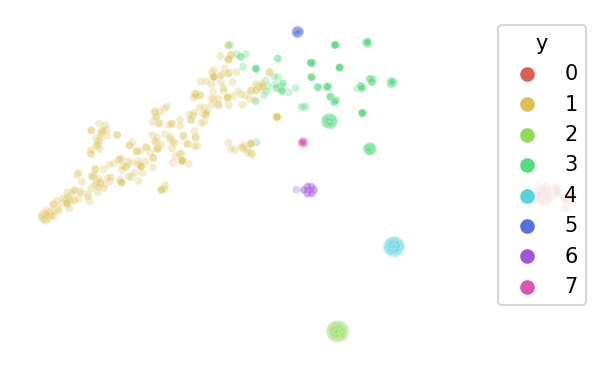

In [319]:
import matplotlib.pyplot as plt
import seaborn as sns

df_subset = pd.DataFrame()
df_subset['tsne-one'] = tsne_results[:,0]
df_subset['tsne-two'] = tsne_results[:,1] 
df_subset['y'] = assigned_clusters

fig = plt.figure(figsize=(5,3), dpi = 150)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

sc = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(centroids)),
    data=df_subset,
    alpha=0.3,
    s=15
)

In [320]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=500, 
                      height=200, 
                      prefer_horizontal=0.5,
                      background_color="white", mode="RGBA")
def cloud(data):
    wordcloud.fit_words(data)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    #plt.savefig('Plot/{}_.png'.format(str(data)), bbox_inches='tight')
    plt.show()

C:\Users\finnocenti\AppData\Local\Temp\ipykernel_12376\1819425611.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sentences = np.array(sentences)


CLUSTER 0, len: 39


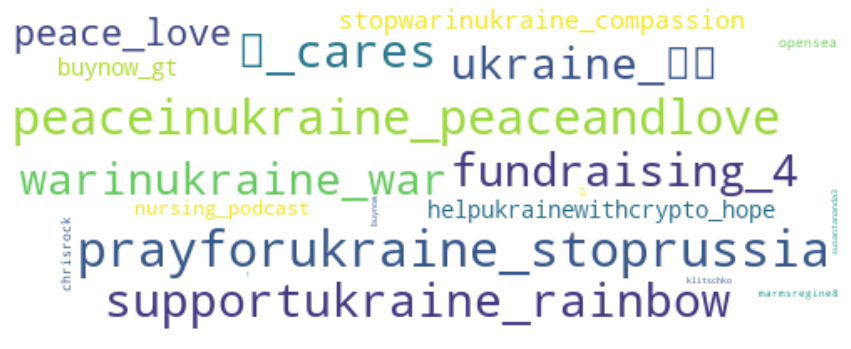

CLUSTER 1, len: 266


<Figure size 432x288 with 0 Axes>

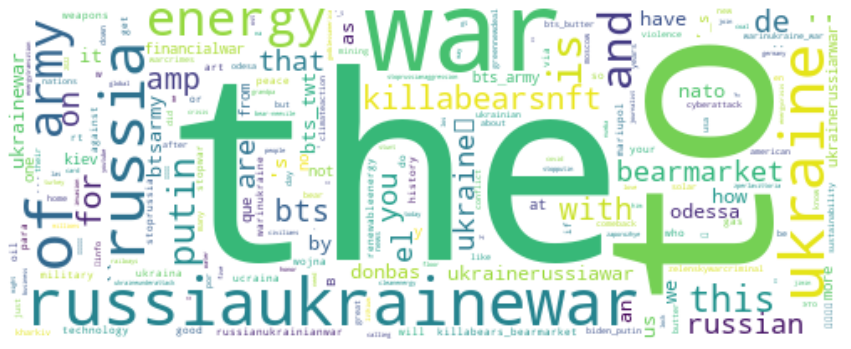

CLUSTER 2, len: 25


<Figure size 432x288 with 0 Axes>

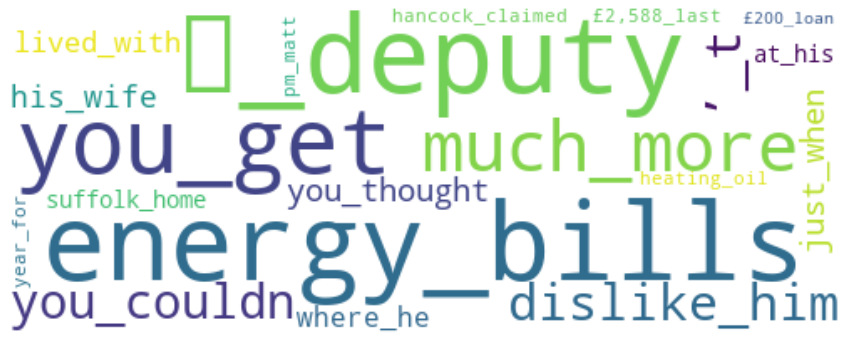

CLUSTER 3, len: 132


<Figure size 432x288 with 0 Axes>

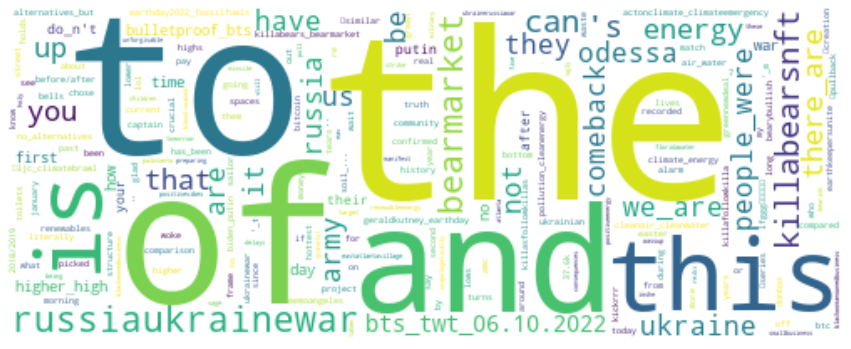

CLUSTER 4, len: 23


<Figure size 432x288 with 0 Axes>

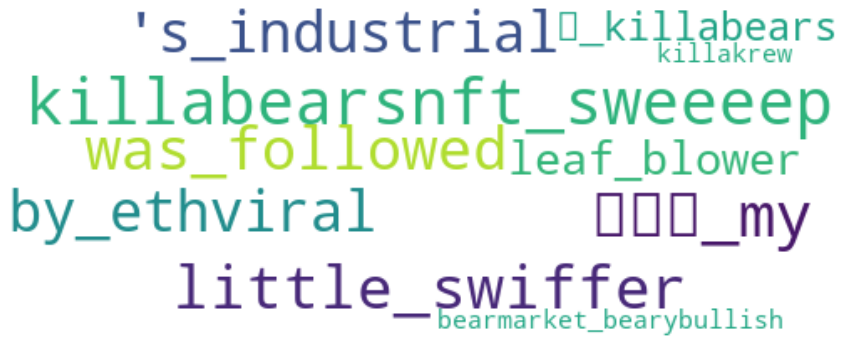

CLUSTER 5, len: 9


<Figure size 432x288 with 0 Axes>

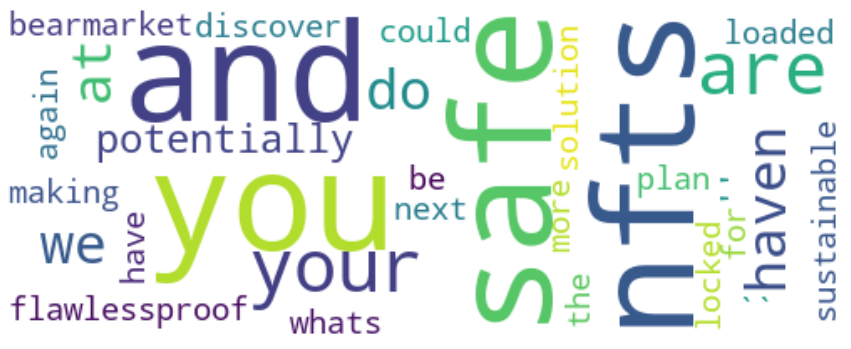

CLUSTER 6, len: 15


<Figure size 432x288 with 0 Axes>

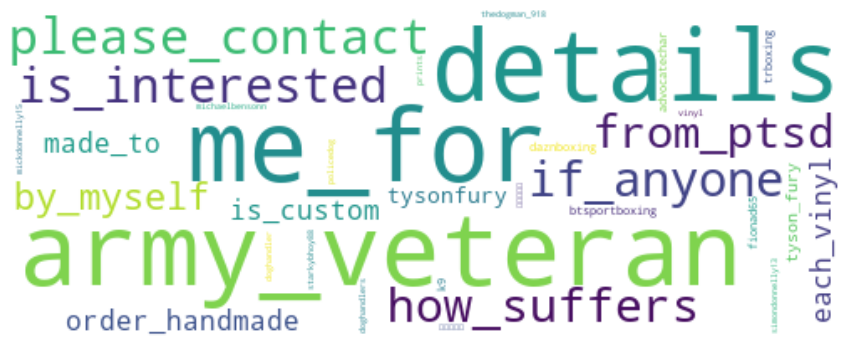

<Figure size 432x288 with 0 Axes>

In [321]:
sentences = np.array(sentences)

for cluster in range(7):
    cluster_sentences = sentences[assigned_clusters == cluster]
    words = pd.Series([item for sublist in cluster_sentences for item in sublist])
    print("CLUSTER {}, len: {}".format(cluster, len(cluster_sentences)))
    cloud(words.value_counts())
    plt.savefig('Plot/{}_.png'.format(str(cluster)), bbox_inches='tight')
    

In [322]:
df

,Unnamed: 0,user_location,id,date,text,in_reply_to_status_id,in_reply_to_user_id,retweet_original_user,retweet_original_tweet_id,hashtags,retweet_count,favorite_count,source,user_id,cleaned,Cluster
0,0,NaN,1517969386249854977,2022-04-23 20:51:18+00:00,Последствия боевых действий на востоке Украины...,NaN,NaN,NaN,NaN,"['Украина', 'Ukraine', 'UkraineWar', 'RussiaUk...",0,0,Twitter for Android,8.028000e+17,последствия боевых действий на востоке украины...,1
1,1,NaN,1517969260949250048,2022-04-23 20:50:48+00:00,@TheresiaCrone #climatecrisis and #RussiaUkrai...,1.517892e+18,1.193110e+18,NaN,NaN,"['climatecrisis', 'RussiaUkraineWar', 'renewab...",0,0,Twitter Web App,1.009679e+09,theresiacrone climatecrisis and russiaukrainew...,1
2,2,Italia,1517968508813991936,2022-04-23 20:47:49+00:00,#Russia 🇷🇺 / #Ukraine 🇺🇦\n\n❗❗Explosions repor...,NaN,NaN,NaN,NaN,"['Russia', 'Ukraine', 'UkraineRussianWar', 'Ru...",0,0,Twitter for Android,9.852641e+17,russia 🇷🇺 ukraine 🇺🇦 ❗❗explosions reported myk...,1
3,3,NaN,1517967820105170944,2022-04-23 20:45:05+00:00,#Turkey closes airspace to Russian military ai...,NaN,NaN,NaN,NaN,"['Turkey', 'Syria', 'Russia', 'Ukraine', 'Russ...",1,1,Twitter Web App,1.326832e+08,turkey closes airspace to russian military air...,1
4,4,NaN,1517967450721112064,2022-04-23 20:43:37+00:00,#NaziRussia #Nazi #NaziRussianArmy #WarCrimes ...,NaN,NaN,NaN,NaN,"['NaziRussia', 'Nazi', 'NaziRussianArmy', 'War...",0,0,Twitter for Android,1.498691e+18,nazirussia nazi nazirussianarmy warcrimes warc...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...,1
512,512,Tel Aviv,1488250981888544779,2022-01-31 20:40:59+00:00,@TheRealNumber6 @RisePDX @Jackthelad1947 @seth...,1.393316e+18,5.938633e+07,NaN,NaN,NaN,122,125,Twitter Web App,5.938633e+07,therealnumber6 risepdx jackthelad1947 seth_lei...,1
513,513,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...,3
514,514,Unceded Squamish Territory,1517841255526510594,2022-04-23 12:22:10+00:00,The past 7 years have been the hottest in reco...,NaN,NaN,NaN,NaN,NaN,149,256,Buffer,1.508848e+07,the past 7 years have been the hottest recorde...,3


In [323]:
wcss = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)

C:\Users\finnocenti\Anaconda3\envs\time_series\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


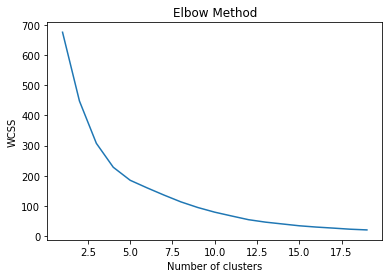

In [324]:
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [325]:
embeddings = []
for sentence in sentences:
    sentence_embedding = np.zeros((300,))
    for word in sentence:
        try:
            sentence_embedding += word_vectors[word]
        except:
            pass
    sentence_embedding = sentence_embedding/len(sentence)
    embeddings.append(sentence_embedding)

In [326]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=40, n_iter=300, verbose=1)
tsne_results = tsne.fit_transform(embeddings)

C:\Users\finnocenti\Anaconda3\envs\time_series\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\finnocenti\Anaconda3\envs\time_series\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 516 samples in 0.000s...
[t-SNE] Computed neighbors for 516 samples in 0.020s...
[t-SNE] Computed conditional probabilities for sample 516 / 516
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.080986
[t-SNE] KL divergence after 300 iterations: 1.134914


0      1
1      1
2      1
3      1
4      1
      ..
511    1
512    1
513    3
514    3
515    1
Name: Cluster, Length: 516, dtype: int32

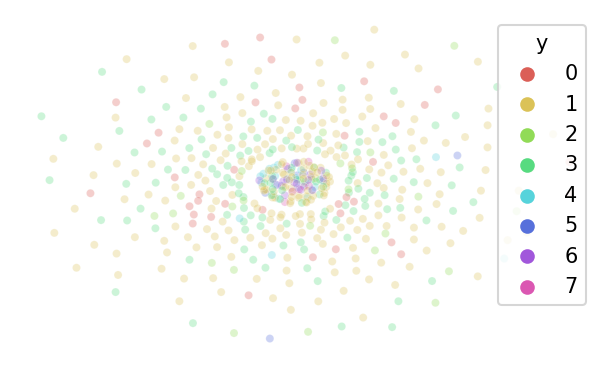

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns

df_subset = pd.DataFrame()
df_subset['tsne-one'] = tsne_results[:,0]
df_subset['tsne-two'] = tsne_results[:,1] 
df_subset['y'] = df["Cluster"]

fig = plt.figure(figsize=(5,3), dpi = 150)

ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])

sc = sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="y",
    palette=sns.color_palette("hls", len(centroids)),
    data=df_subset,
    alpha=0.3,
    s=15
)